In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('review_gojek_en.csv')

In [4]:
df.head()

,userName,score,content,at
0,A Google user,1,the price keeps increasing. i've been using th...,2024-09-10 17:17:13
1,A Google user,1,It is good apps for supporting every daily bas...,2024-08-23 14:05:41
2,A Google user,3,This apps bug for me when ordering gofood. So ...,2024-09-10 15:41:28
3,A Google user,1,The promo codes to redeem are just scams. When...,2024-09-16 01:16:00
4,A Google user,2,Instead of changing the UI frequently which is...,2024-05-24 12:26:12


In [5]:
df.describe()

,score
count,208221.000000
mean,3.685474
std,1.657657
min,1.000000
25%,2.000000
50%,5.000000
75%,5.000000
max,5.000000


<Axes: >

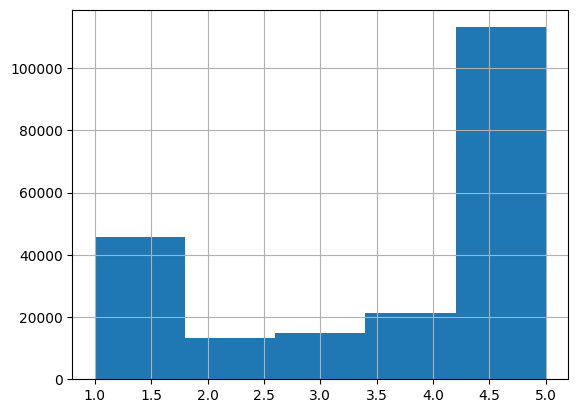

In [6]:
df['score'].hist(bins=5)    

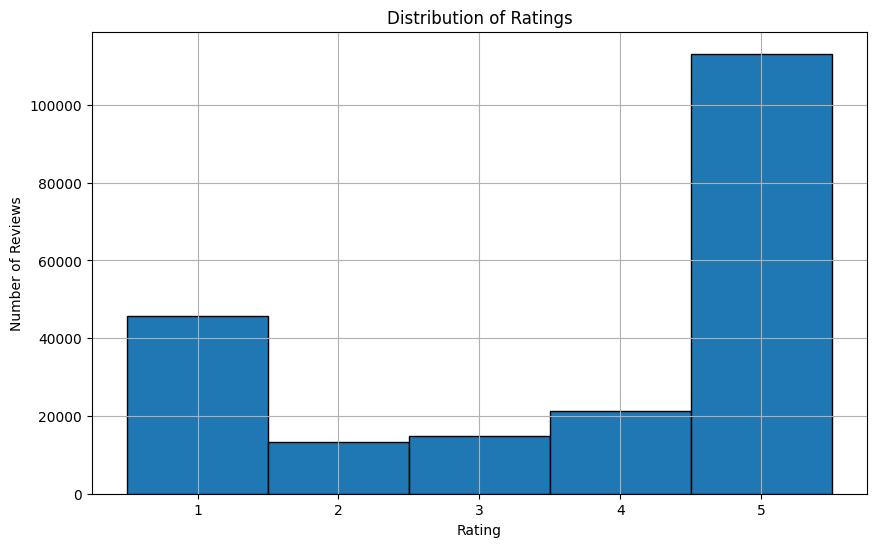

In [13]:
plt.figure(figsize=(10, 6))
df['score'].hist(bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks([1, 2, 3, 4, 5])
plt.savefig('rating_distribution.png')
plt.show()


In [9]:
rating_counts = df['score'].value_counts().sort_index()
total_reviews = len(df)
rating_percentages = (rating_counts / total_reviews * 100).round(2)

average_rating = df['score'].mean()
print(f"\nAverage Rating: {average_rating:.2f}")


Average Rating: 3.69


In [10]:
df['at'] = pd.to_datetime(df['at'])
df['month'] = df['at'].dt.to_period('M')
monthly_avg = df.groupby('month')['score'].mean()

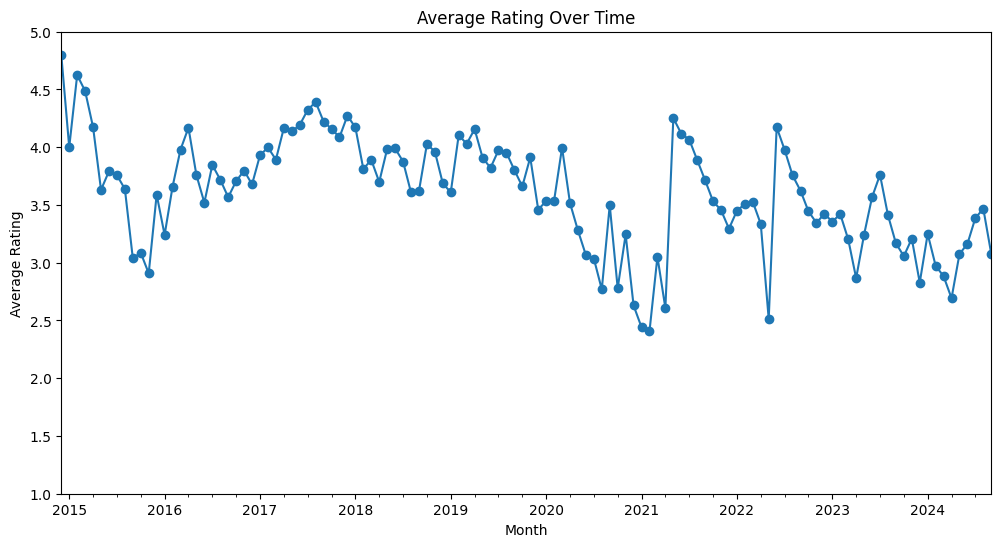

In [12]:
plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='line', marker='o')
plt.title('Average Rating Over Time')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.ylim(1, 5)  # Assuming ratings are from 1 to 5
plt.savefig('rating_trend.png')
plt.show()

In [14]:
print("\nMonthly average ratings:")
print(monthly_avg)


Monthly average ratings:
month
2014-12    4.800000
2015-01    4.000000
2015-02    4.625000
2015-03    4.486486
2015-04    4.173653
             ...   
2024-05    3.075621
2024-06    3.163205
2024-07    3.387916
2024-08    3.467023
2024-09    3.076220
Freq: M, Name: score, Length: 118, dtype: float64
